In [1]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [2]:
text='해보지 않으면 해낼 수 없다.'

In [3]:
text_to_word_sequence(text)

['해보지', '않으면', '해낼', '수', '없다']

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [5]:
doc=['먼저 텍스트의 각 단어를 나누어 토큰화합니다.',
     '텍스트의 단어로 토큰화해야 딥러닝에서 인식됩니다.',
     '토큰화한 결과는 딥러닝에서 사용할 수 있습니다.']

In [6]:
token=Tokenizer()

In [7]:
token.fit_on_texts(doc)

In [8]:
token.word_counts

OrderedDict([('먼저', 1),
             ('텍스트의', 2),
             ('각', 1),
             ('단어를', 1),
             ('나누어', 1),
             ('토큰화합니다', 1),
             ('단어로', 1),
             ('토큰화해야', 1),
             ('딥러닝에서', 2),
             ('인식됩니다', 1),
             ('토큰화한', 1),
             ('결과는', 1),
             ('사용할', 1),
             ('수', 1),
             ('있습니다', 1)])

In [9]:
token.document_count

3

In [10]:
token.word_docs

defaultdict(int,
            {'먼저': 1,
             '나누어': 1,
             '단어를': 1,
             '토큰화합니다': 1,
             '각': 1,
             '텍스트의': 2,
             '토큰화해야': 1,
             '인식됩니다': 1,
             '딥러닝에서': 2,
             '단어로': 1,
             '결과는': 1,
             '토큰화한': 1,
             '있습니다': 1,
             '사용할': 1,
             '수': 1})

In [11]:
token.word_index

{'텍스트의': 1,
 '딥러닝에서': 2,
 '먼저': 3,
 '각': 4,
 '단어를': 5,
 '나누어': 6,
 '토큰화합니다': 7,
 '단어로': 8,
 '토큰화해야': 9,
 '인식됩니다': 10,
 '토큰화한': 11,
 '결과는': 12,
 '사용할': 13,
 '수': 14,
 '있습니다': 15}

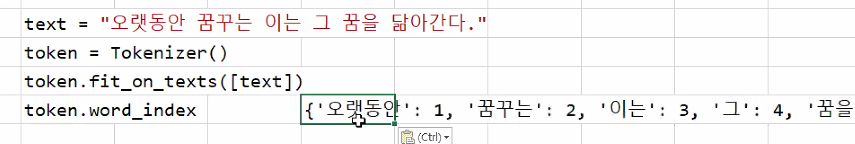

In [12]:
text='오랫동안 꿈꾸는 이는 그 꿈을 닮아간다.'

In [25]:
token=Tokenizer()

In [14]:
# help(token.fit_on_texts)

In [26]:
token.fit_on_texts([text])

In [27]:
token.word_index

{'오랫동안': 1, '꿈꾸는': 2, '이는': 3, '그': 4, '꿈을': 5, '닮아간다': 6}

In [28]:
from tensorflow.keras.utils import to_categorical

In [29]:
text

'오랫동안 꿈꾸는 이는 그 꿈을 닮아간다.'

In [30]:
token.texts_to_sequences

<bound method Tokenizer.texts_to_sequences of <keras.preprocessing.text.Tokenizer object at 0x0000028EFA4BB890>>

In [31]:
# 원핫인코딩 시 숫자 배열로 만들어 놓아야 한다
# 그 숫자 배열은 순서가 있는 토큰으로 만든다

In [32]:
# 그 만든 숫자 배열을 0과 1로만 이루어진 배열로 to_categorical을 통해 바꿔야 한다
# 이때 주의할 점은 배열 맨 앞에 0이 추가(시작, start of sentence,SOS)되어야하므로
# 단어수보다 1이 더 많게 인덱스 숫자를 잡아줘야 한다

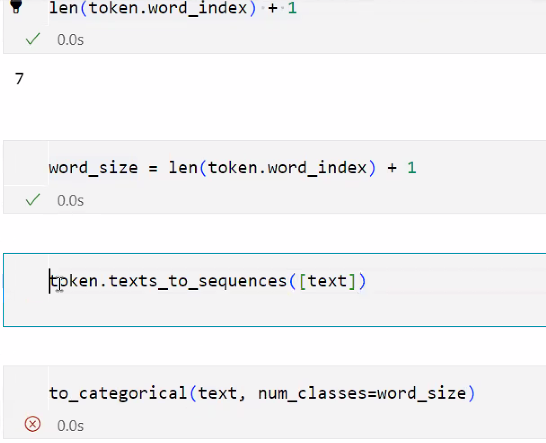

In [35]:
len(token.word_index)+1

7

In [36]:
word_size=len(token.word_index)+1

In [37]:
token.texts_to_sequences([text])

[[1, 2, 3, 4, 5, 6]]

In [38]:
x=token.texts_to_sequences([text])

In [39]:
to_categorical(x,num_classes=word_size)

array([[[0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1.]]], dtype=float32)

원핫인코딩을 사용했을 경우 벡터의 길이가 너무 길어진다는 단점이 있다

예) 1만개의 단어 토큰으로 이루어진 말뭉치(corpus)를 다룬다고 할 때
벡터화하면 9,999개의 0과 1개의 1로 이루어진 희소행렬이 됨

이러한 공간적 낭비를 해결하기 위해 등장한 것이
단어 임베딩(word embeding)이라는 방법

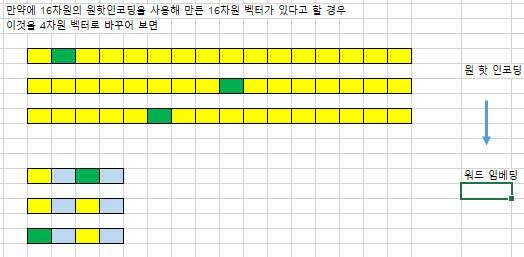

"임베딩"은 주어진 데이터를 저차원 공간으로 투영하는 과정을 의미합니다. 이 과정에서 데이터의 특성이나 구조를 보존하면서
차원을 축소하거나 변형시킵니다. "매장"은 주로 "embedding"이 아닌 "embedding layer"와 같은 용어에서 나오는데,
이는 신경망에서 사용되는 용어로, 단어나 문장을 밀집 벡터(dense vector)로 변환하는 층을 말합니다.

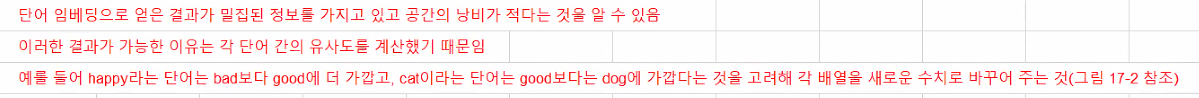

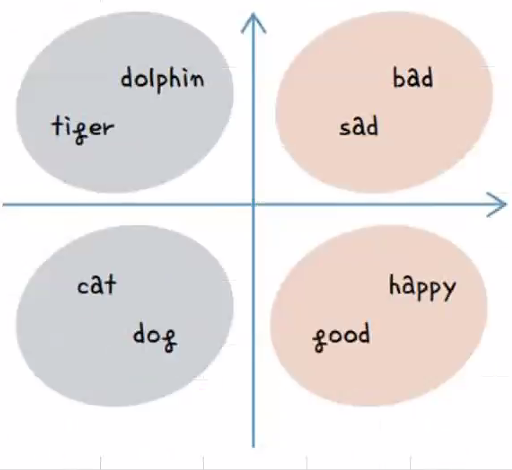

단어 임베딩

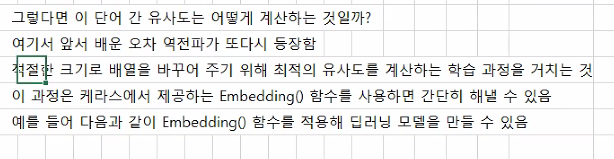

In [41]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential

In [43]:
model=Sequential()

In [44]:
model.add(Embedding(16,4))

In [46]:
model

# 텍스트를 일고 긍정, 부정 예측하기

In [48]:
docs = ["너무 재밌네요","최고예요","참 잘 만든 영화예요","추천하고 싶은 영화입니다",
        "한번 더 보고싶네요","글쎄요","별로예요","생각보다 지루하네요","연기가 어색해요",
        "재미없어요"]

In [49]:
import numpy as np

In [58]:
# 긍정 리뷰는 1, 부정 리뷰는 0으로 클래스를 지정합니다.
classes=np.array([1,1,1,1,1,0,0,0,0,0])

In [59]:
# 토큰화 
token = Tokenizer() # 객체 생성
token.fit_on_texts(docs) # 문서에 맞게 토크나이저 학습
print(token.word_index) # 단어의 인덱스 출력

{'너무': 1, '재밌네요': 2, '최고예요': 3, '참': 4, '잘': 5, '만든': 6, '영화예요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한번': 11, '더': 12, '보고싶네요': 13, '글쎄요': 14, '별로예요': 15, '생각보다': 16, '지루하네요': 17, '연기가': 18, '어색해요': 19, '재미없어요': 20}


In [65]:
x = token.texts_to_sequences(docs) # 텍스트를 시퀀스로 변환

### 텍스트를 시퀀스로 변환

자연어 처리(NLP)에서 텍스트 데이터를 수치적 형태로 변환하는 과정을 의미합니다. 이 변환은 머신러닝 및 딥러닝 모델이 텍스트 데이터를 이해하고 처리할 수 있도록 하기 위해 필요합니다.

구체적인 과정
텍스트 전처리:

문자열 정제: 구두점 제거, 소문자화 등
토큰화: 문장을 단어(또는 서브워드) 단위로 나누는 과정
단어 인덱스 생성:

Tokenizer를 사용하여 각 단어에 고유한 정수 인덱스를 부여합니다.
텍스트를 시퀀스로 변환:

각 단어를 Tokenizer가 부여한 인덱스로 대체합니다.



In [67]:
x

[[1, 2],
 [3],
 [4, 5, 6, 7],
 [8, 9, 10],
 [11, 12, 13],
 [14],
 [15],
 [16, 17],
 [18, 19],
 [20]]

In [69]:
[len(i) for i in token.texts_to_sequences(docs)]

[2, 1, 4, 3, 3, 1, 1, 2, 2, 1]

In [71]:
max([len(i) for i in token.texts_to_sequences(docs)])

4

### 시퀀스 변환

모델을 학습할 때 텍스트 데이터를 시퀀스 형태로 변환하는 것은 필수적인 과정입니다.

이 과정은 텍스트 데이터를 모델이 처리할 수 있는 숫자 형태로 변환하고,

모델이 이해할 수 있도록 일관된 입력 형태를 제공하는 데 중요합니다.

In [61]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding
from tensorflow.keras.utils import to_categorical
from numpy import array


In [72]:
# 패딩, 서로 다른 길이의 데이터를 4로 맞추어 줍니다.
padded_x = pad_sequences(x, 4)  
padded_x

array([[ 0,  0,  1,  2],
       [ 0,  0,  0,  3],
       [ 4,  5,  6,  7],
       [ 0,  8,  9, 10],
       [ 0, 11, 12, 13],
       [ 0,  0,  0, 14],
       [ 0,  0,  0, 15],
       [ 0,  0, 16, 17],
       [ 0,  0, 18, 19],
       [ 0,  0,  0, 20]])

In [73]:
# 임베딩에 입력될 단어의 수를 지정합니다.
word_size = len(token.word_index) +1

### 단어 인덱스의 1-based 인덱싱

단어 인덱스의 1-based 인덱싱:

Keras의 Tokenizer는 단어 인덱스를 1부터 시작하는 정수로 부여합니다. 즉, 인덱스 1부터 시작하여 단어에 순차적으로 정수를 할당합니다.
예를 들어, word_index가 {'안녕하세요': 1, '여러분': 2, '이것은': 3}이라면, 인덱스는 1, 2, 3입니다.

인덱스 0:

Tokenizer는 기본적으로 인덱스 0을 사용하지 않습니다. 인덱스 0은 일반적으로 패딩(padding) 또는 OOV(Out-of-Vocabulary) 토큰으로 예약됩니다.
따라서, input_dim을 설정할 때 인덱스 0을 포함해야 모든 단어가 적절히 임베딩되도록 합니다.

In [63]:
# 단어 임베딩을 포함하여 딥러닝 모델을 만들고 결과를 출력합니다.
model = Sequential()
model.add(Embedding(word_size, 8, input_length=4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 4, 8)              168       
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(padded_x, classes, epochs=20)
print("\n Accuracy: %.4f" % (model.evaluate(padded_x, classes)[1]))

Epoch 1/20
1/1 [==============================] - 0s 426ms/step - loss: 0.6970 - accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.6000
Epoch 4/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6910 - accuracy: 0.7000
Epoch 5/20
1/1 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.7000
Epoch 6/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6870 - accuracy: 0.7000
Epoch 7/20
1/1 [==============================] - 0s 3ms/step - loss: 0.6850 - accuracy: 0.7000
Epoch 8/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6831 - accuracy: 0.7000
Epoch 9/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6811 - accuracy: 0.7000
Epoch 10/20
1/1 [==============================] - 0s 6ms/step - loss: 0.6791 - accuracy: 0.8000
Epoch 11/20
1/1 [====================

### 자연어 처리-텍스트 데이터를 준비하는 과정 요약

1. 토큰화 (Tokenization)

2. 인덱스 매핑 (Index Mapping)

3. 시퀀스 변환 (Sequence Conversion)

4. 시퀀스 맞추기 (Padding/Truncating)

5. 모델 학습 (Model Training)